In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<Axes: xlabel='booking_status', ylabel='count'>

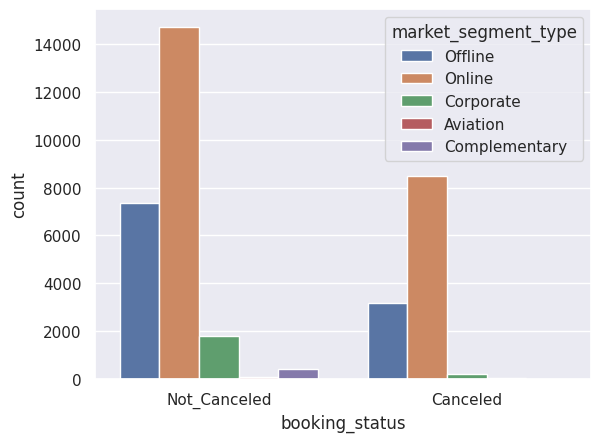

In [3]:
sns.countplot(data=df, x="booking_status", hue="market_segment_type")

<Axes: xlabel='booking_status', ylabel='count'>

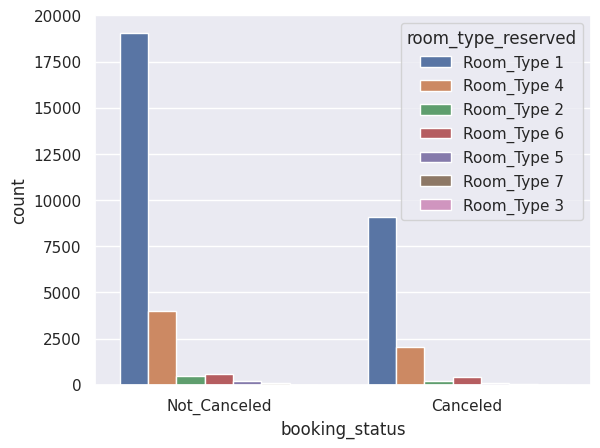

In [4]:
sns.countplot(data=df, x="booking_status", hue="room_type_reserved")

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

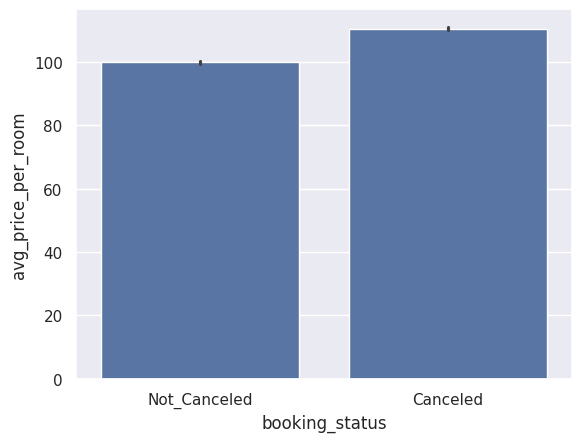

In [5]:
sns.barplot(data=df, x="booking_status", y="avg_price_per_room")

In [4]:
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [3]:
df = df.drop(['Booking_ID','required_car_parking_space','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,224,2017,10,2,Offline,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,Room_Type 1,5,2018,11,6,Online,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,Room_Type 1,1,2018,2,28,Online,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,Room_Type 1,211,2018,5,20,Online,100.00,0,Canceled
4,2,0,1,1,Not Selected,Room_Type 1,48,2018,4,11,Online,94.50,0,Canceled


In [6]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [8]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [9]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [10]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = le.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = le.fit_transform(df['market_segment_type'])
df['booking_status'] = le.fit_transform(df['booking_status'])

In [5]:
from sklearn.utils import resample

df_maj = df[df['booking_status']==1]
df_min = df[df['booking_status']==0]

df_mino_upsam = resample(df_min, replace=True, n_samples=len(df_maj), random_state=42)

df_upsampled = pd.concat([df_maj, df_mino_upsam])

In [7]:
df_upsampled['booking_status'].value_counts()

,count
booking_status,
1,24390
0,24390


In [8]:
z = np.abs(sts.zscore(df_upsampled))
dc = df_upsampled[(z < 3).all(axis=1)]
dc.shape

(44420, 14)

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop('booking_status', axis=1)
y = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred),2))
print("F1 Score:",round(f1_score(y_test, y_pred)*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred)*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred)*100,2))

Acurracy Score: 0.86
F1 Score: 89.72
Precision Score: 90.41
Recall Score: 89.05


In [13]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred),1))
print("F1 Score:",round(f1_score(y_test, y_pred)*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred)*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred)*100,2))

Acurracy Score: 0.9
F1 Score: 92.76
Precision Score: 91.08
Recall Score: 94.5


In [14]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred),2))
print("F1 Score:",round(f1_score(y_test, y_pred)*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred)*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred)*100,2))

Acurracy Score: 0.81
F1 Score: 86.33
Precision Score: 83.71
Recall Score: 89.11
